<a href="https://colab.research.google.com/github/ImbangJayoGampito/DIF62130_B_25_2311532002/blob/main/Praktikum%202/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pasang Library
Impor library yang akan digunakan.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, roc_auc_score

#Pengambilan Dataset
Tahapan
1. Ambil dataset dari https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
2. Upload ke github
3. Pergi ke file raw dari github
4. Baca csv dari link raw github dataset yang telah diupload

In [ ]:
dataset_url = "https://raw.githubusercontent.com/ImbangJayoGampito/DIF62130_B_25_2311532002/refs/heads/main/Dataset/diabetes.csv"
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Exploratory Data Analysis
1. Bentuk data

Bentuk data dalam dimensi (panjang, lebar)

In [ ]:
df.shape

(768, 9)

#Pemisahan Dataset

1. Pemisahan variabel label dan fitur

Fitur adalah kolom dari dataframe yang digunakan untuk input (masukkan) untuk model machine learning yang digunakan. Label adalah kolom dataframe yang digunakan untuk target dari fitur-fitur yang tersedia.

In [ ]:
x = df.drop('Outcome',  axis=1)
y = df['Outcome']
print(x.shape)
print(y.shape)


(768, 8)
(768,)


2. Pemisahan Data Train dan Data Uji

Data dipisah lagi menjadi data latih yang akan digunakan untuk melatih model dan data uji yang akan digunakan untuk pengujian model.

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Pelatihan Model

Model yang digunakan adalah model Logistic Regression karena model ini cocok untuk dataset klasifikasi. Dataset jenis klasifikasi adalah dataset yang digunakan.

In [ ]:
logistic_regression = LogisticRegression(random_state=16)
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Evaluasi Model
Setelah pelatihan model, saatnya evaluasi model klasifikasi dengan menggunakan confusion matrix.

Confusion matrix adalah matriks yang membandingkan jumlah label dari kelas yang diprediksi dengan label yaang sebenarnya. Label yang diprediksi direpresentasikan pada kolom dan label sebenarnya direpresentasikan pada baris. Label yang benar prediksinya terdapat pada bagian diagonal matriks.

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[78 12]
 [34 30]]


Pada dataset, hanya terdapat dua kelas label yaitu diabetes sebagai nilai 1 atau true dan tidak diabetes sebagai nilai 0 atau false.

Pada confusion matrix ini, terdapat 4 bagian yaitu:
1. True positive (TP), harga prediksi yang positif dan sesuai dengan harga sebenarnya
2. False positive (FP), harga yang negatif namun dilabeli positif oleh model
3. True negative (TN), harga negatif sesuai dengan yang dilabeli oleh model
4. False negative (FN), harga positif yang dilabeli negatif oleh model

Matriksnya terlihat seperti

Confusion Matrix


| Stretch/Untouched | ProbDistribution | Accuracy |
| --- | --- | --- |
| Stretched | Gaussian | .843 |

Akurasi: 70.13%


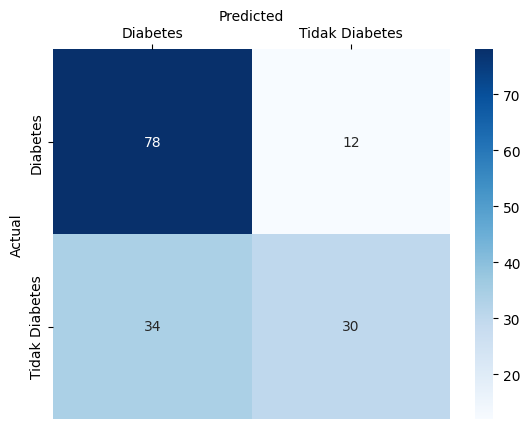

In [ ]:
import numpy as np
accuracy = np.mean(y_test == y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetes','Tidak Diabetes'],
            yticklabels=['Diabetes','Tidak Diabetes'])
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Terdapat beberapa metrik penilaian model, yaitu:
1. Percision, persentase label yang dilabeli secara benar (true positive) dari seluruh label positif model. Percision ditulis dengan

$\text{Precision} = \frac{TP}{TP + FP}$
2. Recall, berapa banyak label positif yang dengan tepat diidentifikasi oleh model dari keseluruhan label yang bernilai positif. Penulisan recall:

$ \text{Recall} = \frac{TP}{TP + FN}$

3. Recall, berapa banyak label negatif yang dengan tepat diidentifikasi oleh model dari keseluruhan label yang bernilai negatif. Penulisan recall:

$ \text{Specificity} = \frac{TN}{TN + FP}$
4. F1 score, merupakan perbandingan kesetaraan antara percision dan recall. Semakin sama harganya maka F1 akan semakin tinggi.

$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$



In [ ]:
target_names = ['Diabetes', 'Tidak Diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

      Diabetes       0.70      0.87      0.77        90
Tidak Diabetes       0.71      0.47      0.57        64

      accuracy                           0.70       154
     macro avg       0.71      0.67      0.67       154
  weighted avg       0.70      0.70      0.69       154



Receiver Operator Characteristic (ROC), adalah sebuah kurva probabilitas yang mencetak nilai (rate) dari true positive dan false positive pada harga threshold yang beragam. Pada ROC terdapat AUC (Area Under the Curve) yang digunakan untuk mengukur kemampuan model membedakan kelas. AUC memiliki nilai diantara 0 sampai dengan 1 di mana 0 mengklasifikasikan seluruh nilai positif menjadi nilai negatif, 0.5 tidak dapat membedakan kedua nilai, dan 1 yaitu selalu mengklasifikasikan nilai positif dengan benar.

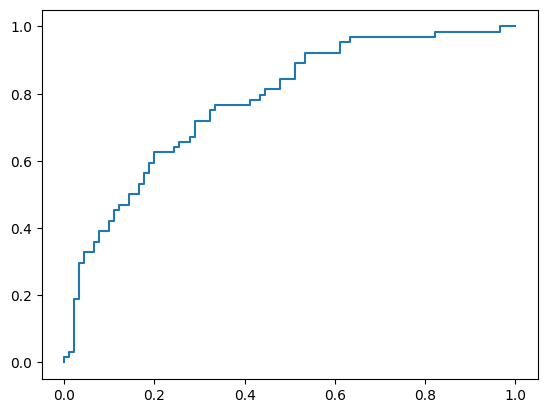

In [ ]:
y_pred_proba = logistic_regression.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.show()